### INF 385 : Lecture 9

embeddings (word2vec)!

In [2]:
# hide warnings to keep things tidy.
import warnings
warnings.filterwarnings('ignore')

import numpy as np
np.random.seed(1) 

%pylab inline

import sklearn
from sklearn.decomposition import PCA

import gensim
# download this file from: https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing
# and change the pointer here appropriately
path_to_vectors = "/Users/byron/dev/snowball/data/word-vectors/GoogleNews-vectors-negative300.bin"
from gensim.models import Word2Vec
# load in the pre-trained vectors
w2v = Word2Vec.load_word2vec_format(path_to_vectors, binary=True)

Populating the interactive namespace from numpy and matplotlib


As explained in class, Word2Vec (https://papers.nips.cc/paper/5021-distributed-representations-of-words-and-phrases-and-their-compositionality.pdf) is a method for inducing vector representations of words, such that "similar" words have similar representations. I emphasize that this approach can be used for other types of discrete data as well (not just text/words!)

In [3]:
# first five dims of the vector representation for 'king'
w2v["king"][:5]

array([ 0.04340638,  0.01026275,  0.00296526,  0.04811715, -0.00883269], dtype=float32)

In [4]:
w2v.most_similar("king")

[('kings', 0.7138045430183411),
 ('queen', 0.6510956287384033),
 ('monarch', 0.6413194537162781),
 ('crown_prince', 0.6204220056533813),
 ('prince', 0.6159994006156921),
 ('sultan', 0.5864824056625366),
 ('ruler', 0.5797566771507263),
 ('princes', 0.5646552443504333),
 ('Prince_Paras', 0.543294370174408),
 ('throne', 0.5422105193138123)]

In [5]:
w2v.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.7118192315101624),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236843824386597),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134939193726),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454)]

In [7]:
list_of_words = ["eggs", "breakfast", "ham", "tofu", "scramble", "coffee", "car", "truck", "road", "fast"]
X = [w2v[w] for w in list_of_words]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
cluster_assignments = kmeans.fit_predict(X)
cluster_assignments 

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=int32)

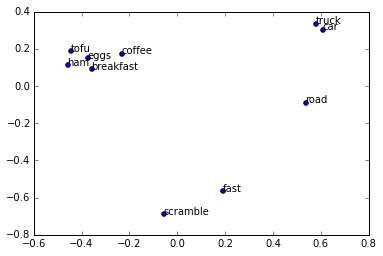

In [10]:
# PCA reduce
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
fig, ax = plt.subplots()
ax.scatter(X_reduced[:, 0], X_reduced[:, 1])

for i in range(len(X)):
    ax.annotate(list_of_words[i], (X_reduced[i]))